In [1]:
# import the necessary packages
import requests
import sys

In [2]:
# initialize the Keras REST API endpoint URL along with the input image paths
KERAS_REST_API_URL = "http://localhost:5000"
IMAGE_PATH = "../data/train/" + "ISIC_0903608.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
image_payload = {"image": image}

In [3]:
r = requests.post(KERAS_REST_API_URL + "/explain", files=image_payload)

In [4]:
r_probability = requests.post(KERAS_REST_API_URL + "/predict", files=image_payload).json()

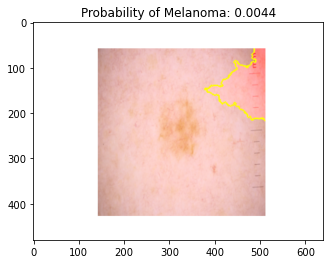

In [5]:
from PIL import Image
import io
import matplotlib.pyplot as plt

if r.status_code == 200 and r_probability["success"]:
    in_memory_file = io.BytesIO(r.content)
    im = Image.open(in_memory_file)
    
    plt.title("Probability of Melanoma: " + r_probability["probability"])
    plt.imshow(im)
    plt.show()
else:
    print ("request failed")